In [1]:
pip install pandas

In [2]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
df_outcomes_details=pd.read_excel('OrganDonor_Consolidated.xlsx',sheet_name='Outcomes')
df_donor_details=pd.read_excel('OrganDonor_Consolidated.xlsx',sheet_name='DonorDetails')
df_referral_details=pd.read_excel('OrganDonor_Consolidated.xlsx',sheet_name='ReferralDetails')
DataD_df=pd.read_excel('DataDictionary.xlsx')


1.Using numpy functions, multiply the following arrays using matrix multiplication.


In [6]:
#1.Using numpy functions, multiply the following arrays using matrix multiplication.
 #a=np.arange(4).reshape(2,2)
# b=np.arange(6).reshape(3,2)

a=np.arange(4).reshape(2,2)
b=np.arange(6).reshape(3,2)
b_trps=np.transpose(b)
print(a)
print(b_trps)
c=a @ b_trps
print(c)

[[0 1]
 [2 3]]
[[0 2 4]
 [1 3 5]]
[[ 1  3  5]
 [ 3 13 23]]


2.On Average, what is the time that passes between approach and procurement?

In [7]:
#2.On Average, what is the time that passes between approach and procurement?

#From Referral details table removing empty rows of time approached and procured
df_clean=df_referral_details.dropna(subset=['time_approached','time_procured'])

df_clean['time_approached']=pd.to_datetime(df_clean['time_approached'])
#df_clean['year']=df_clean['time_approached'].dt.year

df_clean['time_procured']=pd.to_datetime(df_clean['time_procured'])
#df_clean['year']=df_clean['time_referred'].dt.year

df_clean['difference']=(df_clean['time_procured']-df_clean['time_approached']).dt.days
avg=df_clean['difference'].mean()
print(df_clean)
print(avg)


           PatientID  Approached Relatives  Authorized By Family  \
25      OPO1_P648384                     1                     1   
49      OPO1_P404478                     1                     1   
65      OPO1_P340806                     1                     1   
70      OPO1_P278912                     1                     1   
92      OPO1_P160928                     1                     1   
...              ...                   ...                   ...   
133010  OPO6_P925470                     1                     1   
133023  OPO6_P273753                     1                     1   
133026  OPO6_P751972                     1                     1   
133081  OPO6_P667026                     1                     1   
133090  OPO6_P721333                     1                     1   

        Cross_Clamped  transplanted  Tissue_Referral  Eye_Referral  \
25                  1             1                1             1   
49                  1             1        

C:\Users\sateesh\AppData\Local\Temp\ipykernel_2784\851664507.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['time_approached']=pd.to_datetime(df_clean['time_approached'])
C:\Users\sateesh\AppData\Local\Temp\ipykernel_2784\851664507.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['time_procured']=pd.to_datetime(df_clean['time_procured'])
C:\Users\sateesh\AppData\Local\Temp\ipykernel_2784\851664507.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

3.Plot the time series of Donor referrals with 5 month intervals between each.

In [ ]:
#3.Plot the time series of Donor referrals with 5 month intervals between each.
df_referral_details['time_referred']=pd.to_datetime(df_referral_details['time_referred'])
df_referral_details['year']=df_referral_details['time_referred'].dt.year
df_referral_details_maxYear=df_referral_details['year'].max()
df_referral_details_minYear=df_referral_details['year'].min()
#print(df_referral_details_maxYear)

#print(df_referral_details_minYear)
#x=np.arange(df_referral_details_maxYear,df_referral_details_minYear,5)
df_referral_details_resample=df_referral_details['year'].resample('5M').sum()

title_font = {'family': 'sans-serif', 'color': 'crimson', 'weight': 'bold', 'size': 20}
label_font = {'family': 'sans-serif', 'color': 'DarkBlue', 'weight': 'normal', 'size': 15}



plt.title('With 5 month intervals',fontdict=title_font)
plt.xlabel('time_referred',fontdict=label_font)
plt.ylabel('Patient_ID',fontdict=label_font)
plt.plot(df_referral_details_resample.index,df_referral_details_resample.values,color='Blue',marker='o',ms = 15,mec='DarkGreen',mfc='lime',mew=3)
plt.tight_layout()


plt.show()

4.Who is the oldest patient who died of drug overdose?

In [9]:
#4.Who is the oldest patient who died of drug overdose?

#From Donor details table taking lists
patient_donor=df_donor_details['PatientID']
age_donor=df_donor_details['age']
causeofdeath_donor=df_donor_details['causeofdeath']
mechanism_death_donor=df_donor_details['mechanism_of_death']
died_donor={
    "patien_ID":patient_donor,
    "age_donor":age_donor,
    "cd_donor":causeofdeath_donor
}
data_donor=pd.DataFrame(died_donor)
#data_donor_diet=data_donor[(data_donor['cd_donor']=="Overdose") | (data_donor['md_donor']=="Overdose")]
data_donor_overdose=data_donor[(data_donor['cd_donor']=="Overdose")]
data_donor_oldPatient=data_donor_overdose.loc[data_donor_overdose['age_donor'].idxmax()]
data_donor_oldPatient

patien_ID    OPO4_P442864
age_donor            80.0
cd_donor         Overdose
Name: 68688, dtype: object

5.What is the average age of patients with renal failure?

In [11]:
#5.What is the average age of patients with renal failure?

#df_outcomes_details
#Merged two tables of donor_details and outcomes_details
merged_df=pd.merge(df_donor_details,df_outcomes_details,on='PatientID',how='left')
merged_df
renal_failure_List=merged_df[(merged_df['outcome_kidney_left']=="Transplanted") | (merged_df['outcome_kidney_right']=="Transplanted")]
renal_failure_List
renal_failure_List.groupby(['PatientID'])['age'].mean()




PatientID
OPO1_P100082    23.0
OPO1_P100320    10.0
OPO1_P100538    19.0
OPO1_P101409    13.0
OPO1_P101470    24.0
                ... 
OPO6_P991622    47.0
OPO6_P992125    31.0
OPO6_P994456    44.0
OPO6_P996619    62.0
OPO6_P997730    35.0
Name: age, Length: 7476, dtype: float64

6.List all male donors over 75 who had organs recovered for research

In [13]:
#6.List all male donors over 75 who had organs recovered for research

##Merged two tables of donor_details and outcomes_details
merged_df=pd.merge(df_donor_details,df_outcomes_details,on='PatientID',how='left')
merged_df_recovered=merged_df[((merged_df['outcome_heart']== "Recovered for Research") | (merged_df['outcome_liver']== "Recovered for Research") | (merged_df['outcome_kidney_left']== "Recovered for Research") | (merged_df['outcome_kidney_right']== "Recovered for Research") | (merged_df['outcome_lung_left']== "Recovered for Research") | (merged_df['outcome_lung_right']== "Recovered for Research") | (merged_df['outcome_intestine']== "Recovered for Research") | (merged_df['outcome_pancreas']== "Recovered for Research") )]
merged_df_recovered_patients=merged_df_recovered[(merged_df_recovered['age']>75) & (merged_df_recovered['gender']=="M")]
merged_df_recovered_patients

,PatientID,age,gender,race,causeofdeath,mechanism_of_death,brain_death,time_asystole,time_brain_death,outcome_heart,outcome_liver,outcome_kidney_left,outcome_kidney_right,outcome_lung_left,outcome_lung_right,outcome_intestine,outcome_pancreas
13815,OPO1_P463597,76.0,M,Hispanic,cerebrovascular accident,Stroke,1,NaT,2033-07-11 12:29:00,NaN,Transplanted,NaN,NaN,NaN,Recovered for Research,NaN,NaN
35962,OPO3_P862019,83.0,M,White,Anoxia,Cardiovascular,1,NaT,2035-12-10 17:50:00,NaN,Transplanted,Transplanted,Transplanted,Recovered for Research,Recovered for Research,NaN,NaN
45616,OPO4_P199498,77.0,M,White,cerebrovascular accident,Stroke,1,NaT,2030-06-16 07:50:00,NaN,Transplanted,Recovered for Research,Recovered for Research,Recovered for Research,NaN,NaN,NaN
47887,OPO4_P877754,77.0,M,White,cerebrovascular accident,Stroke,1,NaT,2030-11-19 13:50:00,NaN,Transplanted,Recovered for Research,NaN,Recovered for Research,Recovered for Research,NaN,NaN
50813,OPO4_P92279,76.0,M,Hispanic,Head Trauma,Blunt Injury,1,NaT,2031-10-25 11:27:00,NaN,Recovered for Research,Recovered for Research,Recovered for Research,NaN,NaN,NaN,NaN
51321,OPO4_P628770,77.0,M,White,cerebrovascular accident,Stroke,1,NaT,2031-02-14 11:20:00,NaN,Transplanted,Recovered for Research,Recovered for Research,Recovered for Research,Recovered for Research,NaN,NaN
52429,OPO4_P908004,76.0,M,White,cerebrovascular accident,Stroke,1,NaT,2033-01-16 13:50:00,Recovered for Research,Transplanted,NaN,NaN,Recovered for Research,Recovered for Research,NaN,NaN
60562,OPO4_P435716,78.0,M,Hispanic,Anoxia,Cardiovascular,1,NaT,2032-11-14 16:03:00,NaN,Transplanted,NaN,NaN,Recovered for Research,Recovered for Research,NaN,NaN
64894,OPO4_P487002,79.0,M,White,cerebrovascular accident,Stroke,1,NaT,2034-02-27 11:41:00,NaN,Transplanted,Recovered for Research,Recovered for Research,Recovered for Research,Recovered for Research,Recovered for Research,Recovered for Research
81716,OPO5_P287897,79.0,M,Black,Head Trauma,Blunt Injury,1,2032-09-15 12:56:00,2032-09-14 20:34:00,Recovered for Research,Transplanted,NaN,NaN,NaN,NaN,NaN,NaN


7.Make Patient ID as index to the table.

In [15]:
#7.Make Patient ID as index to the table.

#Creating sub dataframe 
subdf_donor_details=df_donor_details['PatientID']
column_name=['age','gender','race','causeofdeath','mechanism_of_death','brain_death','time_asystole','time_brain_death']
subdf_donor_details
s1=pd.DataFrame(data=df_donor_details,index=subdf_donor_details,columns=column_name)
s1

,age,gender,race,causeofdeath,mechanism_of_death,brain_death,time_asystole,time_brain_death
PatientID,,,,,,,,
OPO1_P155959,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT
OPO1_P297347,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT
OPO1_P399316,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT
OPO1_P246407,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT
OPO1_P187209,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT
...,...,...,...,...,...,...,...,...
OPO6_P54946,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT
OPO6_P630991,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT
OPO6_P8748,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT


8.Create a dictionary with the Age and Cause of Death for any 5 random donors.
 Access any one cause of death using the donors age using the get() function

In [17]:
#8.Create a dictionary with the Age and Cause of Death for any 5 random donors.
 #Access any one cause of death using the donors age using the get() function

dic={
    "PatientID":['OPO1_P155959','OPO1_P297347','OPO1_P399316','OPO1_P246407','OPO1_P187209'],
    "age":[54,78,57,78,70],
    "causeofdeath":['Unknown','Unknown','Anoxia','cerebrovascular accident','Unknown']
}
print(dic)


{'PatientID': ['OPO1_P155959', 'OPO1_P297347', 'OPO1_P399316', 'OPO1_P246407', 'OPO1_P187209'], 'age': [54, 78, 57, 78, 70], 'causeofdeath': ['Unknown', 'Unknown', 'Anoxia', 'cerebrovascular accident', 'Unknown']}


In [18]:
#8.Access any one cause of death using the donors age using the get() function
#Frome above dictionary
age=dic['age']
causeofdeath=dic['causeofdeath']
data=dict(zip(age,causeofdeath))
#data
print(data.get(78))

cerebrovascular accident


9.Create a heatmap on the donor details table.


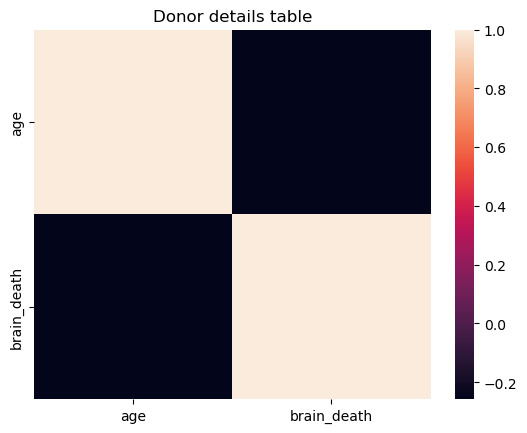

In [53]:
#9.Create a heatmap on the donor details table.
df_donor_details

#heatmap works for numerical values.should avoid the string datatype columns for heatmap
#if we include those will get this error(ValueError: could not convert string to float: 'OPO1_P155959')

numerical_columns = df_donor_details.select_dtypes(include=['number']).columns
correlation_matrix = df_donor_details[numerical_columns].corr()
hm=sns.heatmap(data=correlation_matrix)
plt.title('Donor details table')

plt.show()

10.Create a bar chart showing the number of donors by procured year. 
Add hatching to the bars using the set_hatch() method, and exclude any outlier years.

C:\Users\sateesh\AppData\Local\Temp\ipykernel_2784\4214951040.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_don_ref_df_cleaned['Year'] = merged_don_ref_df_cleaned['time_procured'].dt.year


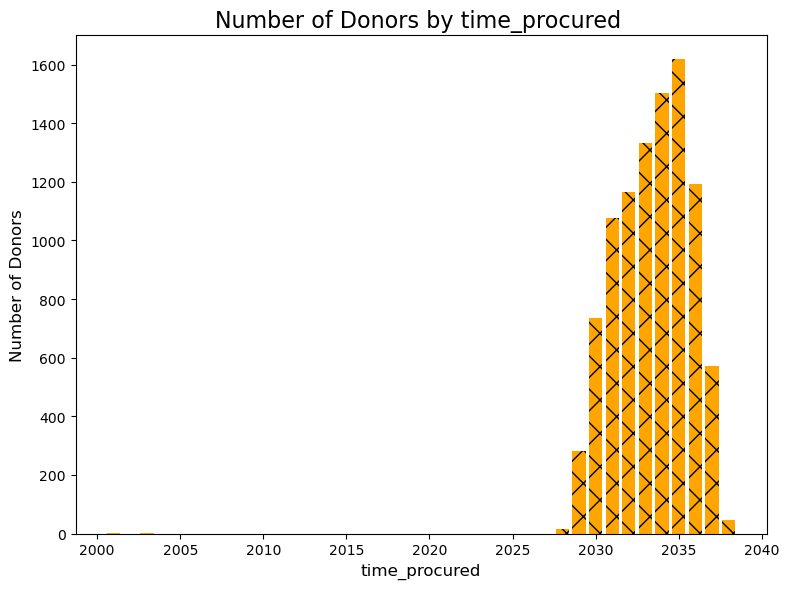

In [20]:
#10.Create a bar chart showing the number of donors by procured year. 
#Add hatching to the bars using the set_hatch() method, and exclude any outlier years.

# Merging two data sets of donor_details and referral_details
merged_don_ref_df=pd.merge(df_donor_details,df_referral_details,on='PatientID',how='left')
#merged_don_ref_df
merged_don_ref_df['time_procured']=pd.to_datetime(merged_don_ref_df['time_procured'])
#merged_don_ref_df['year']=merged_don_ref_df['time_procured'].dt.year


merged_don_ref_df_cleaned = merged_don_ref_df.dropna(subset=['time_procured'])
merged_don_ref_df_cleaned['Year'] = merged_don_ref_df_cleaned['time_procured'].dt.year
donors_by_year = merged_don_ref_df_cleaned.groupby('Year').size()

# Identify outlier years using IQR (Interquartile Range)
Q1 = donors_by_year.quantile(0.25)
Q3 = donors_by_year.quantile(0.75)
IQR = Q3 - Q1

# Define outliers as those outside of 1.5 * IQR range
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

donors_by_year_cleaned = donors_by_year[(donors_by_year >= lower_bound) & (donors_by_year <= upper_bound)]

fig, ax = plt.subplots(figsize=(8, 6))
bars = ax.bar(donors_by_year_cleaned.index, donors_by_year_cleaned.values, color='orange')

for bar in bars:
    bar.set_hatch('x')  # 'x' creates a crosshatch pattern

ax.set_title('Number of Donors by time_procured ', fontsize=16)
ax.set_xlabel('time_procured', fontsize=12)
ax.set_ylabel('Number of Donors', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

11.Plot a Donut chart to show donor distribution by Gender.


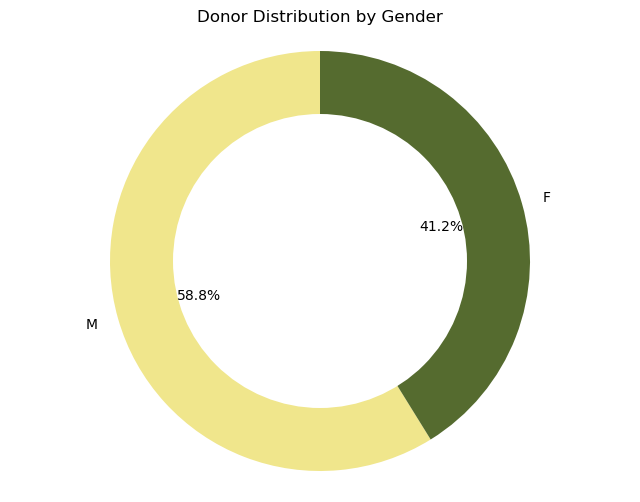

In [57]:
#11.Plot a Donut chart to show donor distribution by Gender.
#Donor detials table
df_donor_details

# count the number of donors by gender
gender_counts = df_donor_details['gender'].value_counts()

mycolors=['Khaki','DarkOliveGreen']

plt.figure(figsize=(8, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=mycolors)

# Add a circle at the center to create a donut effect
centre_circle = plt.Circle((0, 0), 0.70, color='white', fc='white', linewidth=0)
plt.gca().add_artist(centre_circle)

plt.title('Donor Distribution by Gender')
plt.axis('equal')  
plt.show()


12.Using loc, retrieve the race and time of aysytole of donors between indices 1001 and 2001.

In [23]:
#12.Using loc, retrieve the race and time of aysytole of donors between indices 1001 and 2001.
df_donor_details.loc[1001:2001,['race','time_asystole','PatientID']]


,race,time_asystole,PatientID
1001,White,2034-03-28 16:47:00,OPO1_P124711
1002,Hispanic,NaT,OPO1_P934782
1003,White,2034-01-19 12:00:00,OPO1_P496267
1004,Hispanic,2032-01-19 18:49:00,OPO1_P962984
1005,Hispanic,2036-02-05 18:31:00,OPO1_P725315
...,...,...,...
1997,Hispanic,2037-05-19 23:10:00,OPO1_P136906
1998,Hispanic,NaT,OPO1_P966799
1999,White,2034-11-20 21:21:00,OPO1_P636889
2000,Hispanic,2034-02-04 15:00:00,OPO1_P154285


13.np.arange(1,31).reshape(6,5)
    1. Find array slicing to get the elements 1,2,8,30. 
    2. When the value is less than 9, print as 0,else print 99

In [25]:
#13.np.arange(1,31).reshape(6,5)
   # 1. Find array slicing to get the elements 1,2,8,30. 
   # 2. When the value is less than 9, print as 0,else print 99
arr1=np.arange(1,31).reshape(6,5)
arr1
print(arr1[0:1,0:2])
print(arr1[0,0])
print(arr1[0,1])
print(arr1[1,2])
print(arr1[5,4])




[[1 2]]
1
2
8
30


In [26]:
  # 13.2. When the value is less than 9, print as 0,else print 99
arr1=np.arange(1,31).reshape(6,5)
newarr=np.where(arr1<9,0,99)
newarr

array([[ 0,  0,  0,  0,  0],
       [ 0,  0,  0, 99, 99],
       [99, 99, 99, 99, 99],
       [99, 99, 99, 99, 99],
       [99, 99, 99, 99, 99],
       [99, 99, 99, 99, 99]])

14.Create subplots for the following data
x = np.arange(0, 10, 0.1)
y = np.sin(np.pi * x) + x 
using an object-oriented approach, and arrange the subplots in a 2x2 grid layout

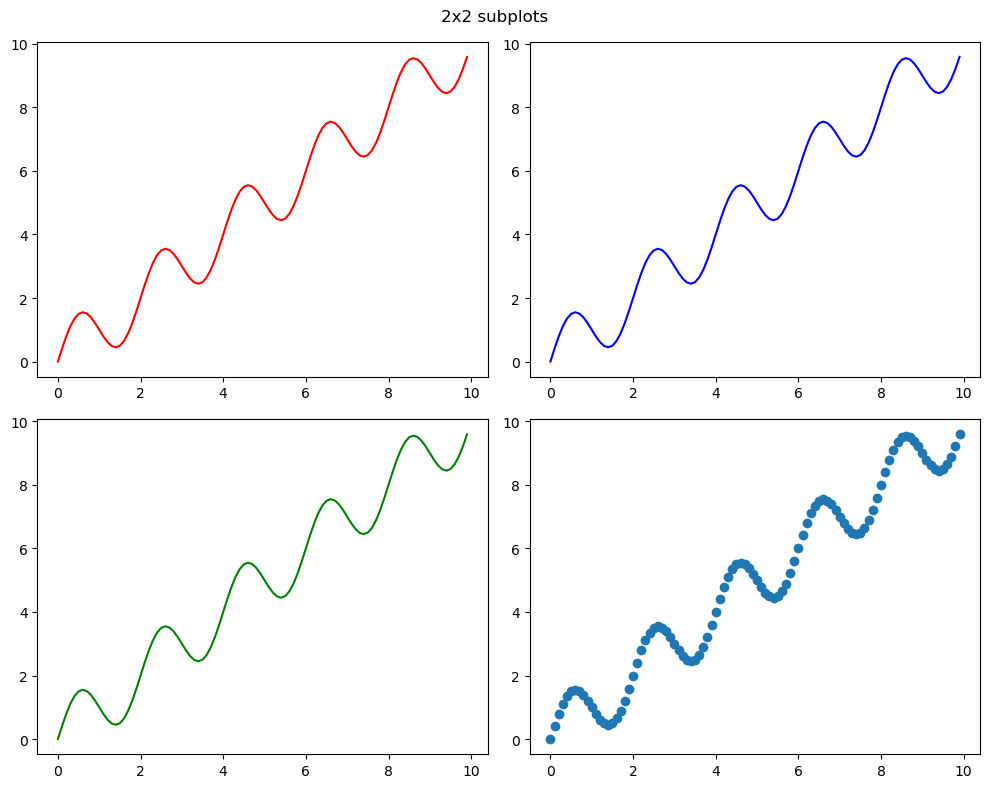

In [28]:
#14.Create subplots for the following data
#x = np.arange(0, 10, 0.1)
#y = np.sin(np.pi * x) + x 
#using an object-oriented approach, and arrange the subplots in a 2x2 grid layout
x = np.arange(0, 10, 0.1)
y = np.sin(np.pi * x) + x 
fig, axs=plt.subplots(2,2,figsize=(10,8))
axs[0][0].plot(x,y,'r')
axs[0][1].plot(x,y,'b')
axs[1][0].plot(x,y,'g')
axs[1][1].plot(x,y,'o')
fig.suptitle("2x2 subplots")

#axs[0][0].set_title("subplots")
plt.tight_layout()

15Create a box plot on any values in the dataset. Ensure that it is analytically correct.


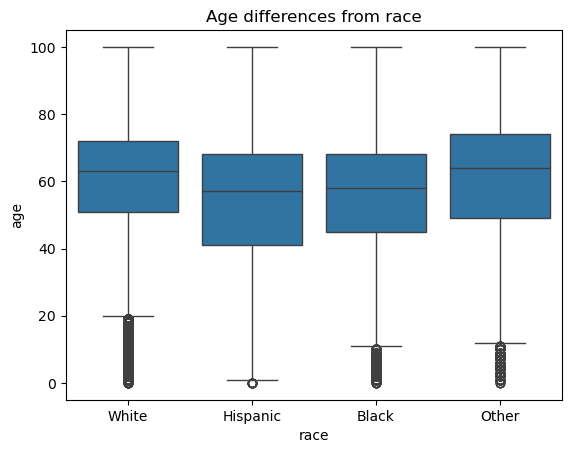

In [51]:
#15Create a box plot on any values in the dataset. Ensure that it is analytically correct.
# the average age of donors from the different race. 
import seaborn as sns
sns.boxplot(x='race',y='age',data=df_donor_details)
plt.title('Age differences from race')

plt.show()

In [1]:
pip install pandas

In [2]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
df_outcomes_details=pd.read_excel('OrganDonor_Consolidated.xlsx',sheet_name='Outcomes')
df_donor_details=pd.read_excel('OrganDonor_Consolidated.xlsx',sheet_name='DonorDetails')
df_referral_details=pd.read_excel('OrganDonor_Consolidated.xlsx',sheet_name='ReferralDetails')
DataD_df=pd.read_excel('DataDictionary.xlsx')


1.Using numpy functions, multiply the following arrays using matrix multiplication.


In [6]:
#1.Using numpy functions, multiply the following arrays using matrix multiplication.
 #a=np.arange(4).reshape(2,2)
# b=np.arange(6).reshape(3,2)

a=np.arange(4).reshape(2,2)
b=np.arange(6).reshape(3,2)
b_trps=np.transpose(b)
print(a)
print(b_trps)
c=a @ b_trps
print(c)

[[0 1]
 [2 3]]
[[0 2 4]
 [1 3 5]]
[[ 1  3  5]
 [ 3 13 23]]


2.On Average, what is the time that passes between approach and procurement?

In [7]:
#2.On Average, what is the time that passes between approach and procurement?

#From Referral details table removing empty rows of time approached and procured
df_clean=df_referral_details.dropna(subset=['time_approached','time_procured'])

df_clean['time_approached']=pd.to_datetime(df_clean['time_approached'])
#df_clean['year']=df_clean['time_approached'].dt.year

df_clean['time_procured']=pd.to_datetime(df_clean['time_procured'])
#df_clean['year']=df_clean['time_referred'].dt.year

df_clean['difference']=(df_clean['time_procured']-df_clean['time_approached']).dt.days
avg=df_clean['difference'].mean()
print(df_clean)
print(avg)


           PatientID  Approached Relatives  Authorized By Family  \
25      OPO1_P648384                     1                     1   
49      OPO1_P404478                     1                     1   
65      OPO1_P340806                     1                     1   
70      OPO1_P278912                     1                     1   
92      OPO1_P160928                     1                     1   
...              ...                   ...                   ...   
133010  OPO6_P925470                     1                     1   
133023  OPO6_P273753                     1                     1   
133026  OPO6_P751972                     1                     1   
133081  OPO6_P667026                     1                     1   
133090  OPO6_P721333                     1                     1   

        Cross_Clamped  transplanted  Tissue_Referral  Eye_Referral  \
25                  1             1                1             1   
49                  1             1        

C:\Users\sateesh\AppData\Local\Temp\ipykernel_2784\851664507.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['time_approached']=pd.to_datetime(df_clean['time_approached'])
C:\Users\sateesh\AppData\Local\Temp\ipykernel_2784\851664507.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['time_procured']=pd.to_datetime(df_clean['time_procured'])
C:\Users\sateesh\AppData\Local\Temp\ipykernel_2784\851664507.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

3.Plot the time series of Donor referrals with 5 month intervals between each.

In [ ]:
#3.Plot the time series of Donor referrals with 5 month intervals between each.
df_referral_details['time_referred']=pd.to_datetime(df_referral_details['time_referred'])
df_referral_details['year']=df_referral_details['time_referred'].dt.year
df_referral_details_maxYear=df_referral_details['year'].max()
df_referral_details_minYear=df_referral_details['year'].min()
#print(df_referral_details_maxYear)

#print(df_referral_details_minYear)
#x=np.arange(df_referral_details_maxYear,df_referral_details_minYear,5)
df_referral_details_resample=df_referral_details['year'].resample('5M').sum()

title_font = {'family': 'sans-serif', 'color': 'crimson', 'weight': 'bold', 'size': 20}
label_font = {'family': 'sans-serif', 'color': 'DarkBlue', 'weight': 'normal', 'size': 15}



plt.title('With 5 month intervals',fontdict=title_font)
plt.xlabel('time_referred',fontdict=label_font)
plt.ylabel('Patient_ID',fontdict=label_font)
plt.plot(df_referral_details_resample.index,df_referral_details_resample.values,color='Blue',marker='o',ms = 15,mec='DarkGreen',mfc='lime',mew=3)
plt.tight_layout()


plt.show()

4.Who is the oldest patient who died of drug overdose?

In [9]:
#4.Who is the oldest patient who died of drug overdose?

#From Donor details table taking lists
patient_donor=df_donor_details['PatientID']
age_donor=df_donor_details['age']
causeofdeath_donor=df_donor_details['causeofdeath']
mechanism_death_donor=df_donor_details['mechanism_of_death']
died_donor={
    "patien_ID":patient_donor,
    "age_donor":age_donor,
    "cd_donor":causeofdeath_donor
}
data_donor=pd.DataFrame(died_donor)
#data_donor_diet=data_donor[(data_donor['cd_donor']=="Overdose") | (data_donor['md_donor']=="Overdose")]
data_donor_overdose=data_donor[(data_donor['cd_donor']=="Overdose")]
data_donor_oldPatient=data_donor_overdose.loc[data_donor_overdose['age_donor'].idxmax()]
data_donor_oldPatient

patien_ID    OPO4_P442864
age_donor            80.0
cd_donor         Overdose
Name: 68688, dtype: object

5.What is the average age of patients with renal failure?

In [11]:
#5.What is the average age of patients with renal failure?

#df_outcomes_details
#Merged two tables of donor_details and outcomes_details
merged_df=pd.merge(df_donor_details,df_outcomes_details,on='PatientID',how='left')
merged_df
renal_failure_List=merged_df[(merged_df['outcome_kidney_left']=="Transplanted") | (merged_df['outcome_kidney_right']=="Transplanted")]
renal_failure_List
renal_failure_List.groupby(['PatientID'])['age'].mean()




PatientID
OPO1_P100082    23.0
OPO1_P100320    10.0
OPO1_P100538    19.0
OPO1_P101409    13.0
OPO1_P101470    24.0
                ... 
OPO6_P991622    47.0
OPO6_P992125    31.0
OPO6_P994456    44.0
OPO6_P996619    62.0
OPO6_P997730    35.0
Name: age, Length: 7476, dtype: float64

6.List all male donors over 75 who had organs recovered for research

In [13]:
#6.List all male donors over 75 who had organs recovered for research

##Merged two tables of donor_details and outcomes_details
merged_df=pd.merge(df_donor_details,df_outcomes_details,on='PatientID',how='left')
merged_df_recovered=merged_df[((merged_df['outcome_heart']== "Recovered for Research") | (merged_df['outcome_liver']== "Recovered for Research") | (merged_df['outcome_kidney_left']== "Recovered for Research") | (merged_df['outcome_kidney_right']== "Recovered for Research") | (merged_df['outcome_lung_left']== "Recovered for Research") | (merged_df['outcome_lung_right']== "Recovered for Research") | (merged_df['outcome_intestine']== "Recovered for Research") | (merged_df['outcome_pancreas']== "Recovered for Research") )]
merged_df_recovered_patients=merged_df_recovered[(merged_df_recovered['age']>75) & (merged_df_recovered['gender']=="M")]
merged_df_recovered_patients

,PatientID,age,gender,race,causeofdeath,mechanism_of_death,brain_death,time_asystole,time_brain_death,outcome_heart,outcome_liver,outcome_kidney_left,outcome_kidney_right,outcome_lung_left,outcome_lung_right,outcome_intestine,outcome_pancreas
13815,OPO1_P463597,76.0,M,Hispanic,cerebrovascular accident,Stroke,1,NaT,2033-07-11 12:29:00,NaN,Transplanted,NaN,NaN,NaN,Recovered for Research,NaN,NaN
35962,OPO3_P862019,83.0,M,White,Anoxia,Cardiovascular,1,NaT,2035-12-10 17:50:00,NaN,Transplanted,Transplanted,Transplanted,Recovered for Research,Recovered for Research,NaN,NaN
45616,OPO4_P199498,77.0,M,White,cerebrovascular accident,Stroke,1,NaT,2030-06-16 07:50:00,NaN,Transplanted,Recovered for Research,Recovered for Research,Recovered for Research,NaN,NaN,NaN
47887,OPO4_P877754,77.0,M,White,cerebrovascular accident,Stroke,1,NaT,2030-11-19 13:50:00,NaN,Transplanted,Recovered for Research,NaN,Recovered for Research,Recovered for Research,NaN,NaN
50813,OPO4_P92279,76.0,M,Hispanic,Head Trauma,Blunt Injury,1,NaT,2031-10-25 11:27:00,NaN,Recovered for Research,Recovered for Research,Recovered for Research,NaN,NaN,NaN,NaN
51321,OPO4_P628770,77.0,M,White,cerebrovascular accident,Stroke,1,NaT,2031-02-14 11:20:00,NaN,Transplanted,Recovered for Research,Recovered for Research,Recovered for Research,Recovered for Research,NaN,NaN
52429,OPO4_P908004,76.0,M,White,cerebrovascular accident,Stroke,1,NaT,2033-01-16 13:50:00,Recovered for Research,Transplanted,NaN,NaN,Recovered for Research,Recovered for Research,NaN,NaN
60562,OPO4_P435716,78.0,M,Hispanic,Anoxia,Cardiovascular,1,NaT,2032-11-14 16:03:00,NaN,Transplanted,NaN,NaN,Recovered for Research,Recovered for Research,NaN,NaN
64894,OPO4_P487002,79.0,M,White,cerebrovascular accident,Stroke,1,NaT,2034-02-27 11:41:00,NaN,Transplanted,Recovered for Research,Recovered for Research,Recovered for Research,Recovered for Research,Recovered for Research,Recovered for Research
81716,OPO5_P287897,79.0,M,Black,Head Trauma,Blunt Injury,1,2032-09-15 12:56:00,2032-09-14 20:34:00,Recovered for Research,Transplanted,NaN,NaN,NaN,NaN,NaN,NaN


7.Make Patient ID as index to the table.

In [15]:
#7.Make Patient ID as index to the table.

#Creating sub dataframe 
subdf_donor_details=df_donor_details['PatientID']
column_name=['age','gender','race','causeofdeath','mechanism_of_death','brain_death','time_asystole','time_brain_death']
subdf_donor_details
s1=pd.DataFrame(data=df_donor_details,index=subdf_donor_details,columns=column_name)
s1

,age,gender,race,causeofdeath,mechanism_of_death,brain_death,time_asystole,time_brain_death
PatientID,,,,,,,,
OPO1_P155959,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT
OPO1_P297347,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT
OPO1_P399316,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT
OPO1_P246407,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT
OPO1_P187209,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT
...,...,...,...,...,...,...,...,...
OPO6_P54946,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT
OPO6_P630991,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT
OPO6_P8748,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT


8.Create a dictionary with the Age and Cause of Death for any 5 random donors.
 Access any one cause of death using the donors age using the get() function

In [17]:
#8.Create a dictionary with the Age and Cause of Death for any 5 random donors.
 #Access any one cause of death using the donors age using the get() function

dic={
    "PatientID":['OPO1_P155959','OPO1_P297347','OPO1_P399316','OPO1_P246407','OPO1_P187209'],
    "age":[54,78,57,78,70],
    "causeofdeath":['Unknown','Unknown','Anoxia','cerebrovascular accident','Unknown']
}
print(dic)


{'PatientID': ['OPO1_P155959', 'OPO1_P297347', 'OPO1_P399316', 'OPO1_P246407', 'OPO1_P187209'], 'age': [54, 78, 57, 78, 70], 'causeofdeath': ['Unknown', 'Unknown', 'Anoxia', 'cerebrovascular accident', 'Unknown']}


In [18]:
#8.Access any one cause of death using the donors age using the get() function
#Frome above dictionary
age=dic['age']
causeofdeath=dic['causeofdeath']
data=dict(zip(age,causeofdeath))
#data
print(data.get(78))

cerebrovascular accident


9.Create a heatmap on the donor details table.


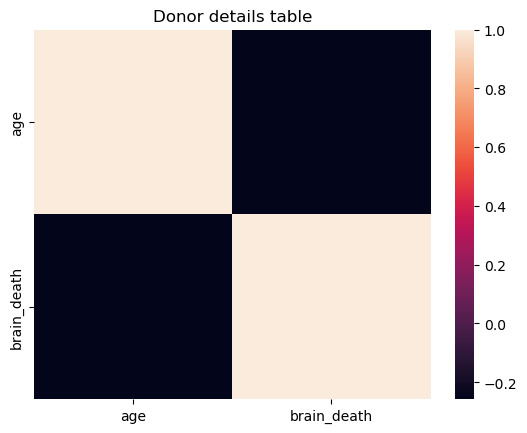

In [53]:
#9.Create a heatmap on the donor details table.
df_donor_details

#heatmap works for numerical values.should avoid the string datatype columns for heatmap
#if we include those will get this error(ValueError: could not convert string to float: 'OPO1_P155959')

numerical_columns = df_donor_details.select_dtypes(include=['number']).columns
correlation_matrix = df_donor_details[numerical_columns].corr()
hm=sns.heatmap(data=correlation_matrix)
plt.title('Donor details table')

plt.show()

10.Create a bar chart showing the number of donors by procured year. 
Add hatching to the bars using the set_hatch() method, and exclude any outlier years.

C:\Users\sateesh\AppData\Local\Temp\ipykernel_2784\4214951040.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_don_ref_df_cleaned['Year'] = merged_don_ref_df_cleaned['time_procured'].dt.year


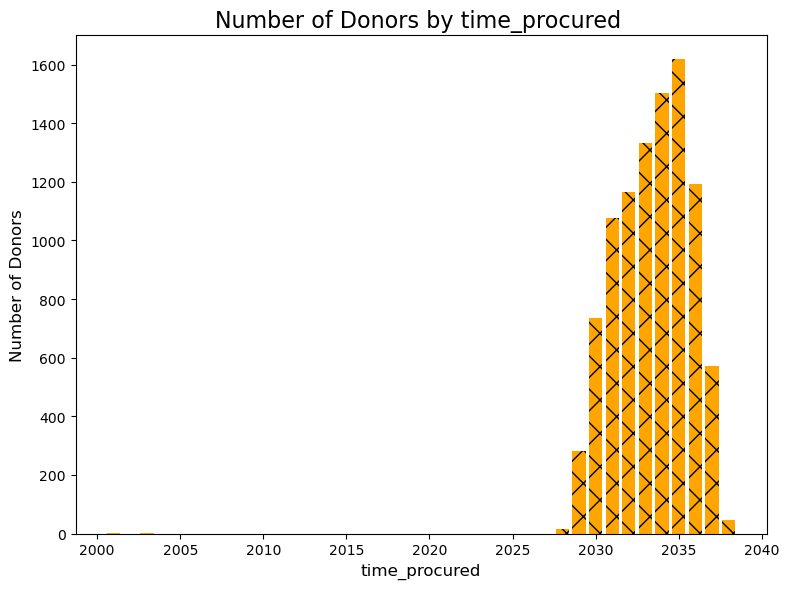

In [20]:
#10.Create a bar chart showing the number of donors by procured year. 
#Add hatching to the bars using the set_hatch() method, and exclude any outlier years.

# Merging two data sets of donor_details and referral_details
merged_don_ref_df=pd.merge(df_donor_details,df_referral_details,on='PatientID',how='left')
#merged_don_ref_df
merged_don_ref_df['time_procured']=pd.to_datetime(merged_don_ref_df['time_procured'])
#merged_don_ref_df['year']=merged_don_ref_df['time_procured'].dt.year


merged_don_ref_df_cleaned = merged_don_ref_df.dropna(subset=['time_procured'])
merged_don_ref_df_cleaned['Year'] = merged_don_ref_df_cleaned['time_procured'].dt.year
donors_by_year = merged_don_ref_df_cleaned.groupby('Year').size()

# Identify outlier years using IQR (Interquartile Range)
Q1 = donors_by_year.quantile(0.25)
Q3 = donors_by_year.quantile(0.75)
IQR = Q3 - Q1

# Define outliers as those outside of 1.5 * IQR range
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

donors_by_year_cleaned = donors_by_year[(donors_by_year >= lower_bound) & (donors_by_year <= upper_bound)]

fig, ax = plt.subplots(figsize=(8, 6))
bars = ax.bar(donors_by_year_cleaned.index, donors_by_year_cleaned.values, color='orange')

for bar in bars:
    bar.set_hatch('x')  # 'x' creates a crosshatch pattern

ax.set_title('Number of Donors by time_procured ', fontsize=16)
ax.set_xlabel('time_procured', fontsize=12)
ax.set_ylabel('Number of Donors', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

11.Plot a Donut chart to show donor distribution by Gender.


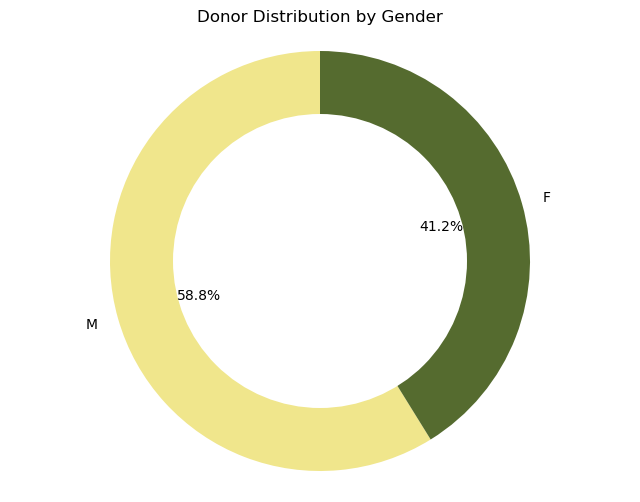

In [57]:
#11.Plot a Donut chart to show donor distribution by Gender.
#Donor detials table
df_donor_details

# count the number of donors by gender
gender_counts = df_donor_details['gender'].value_counts()

mycolors=['Khaki','DarkOliveGreen']

plt.figure(figsize=(8, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=mycolors)

# Add a circle at the center to create a donut effect
centre_circle = plt.Circle((0, 0), 0.70, color='white', fc='white', linewidth=0)
plt.gca().add_artist(centre_circle)

plt.title('Donor Distribution by Gender')
plt.axis('equal')  
plt.show()


12.Using loc, retrieve the race and time of aysytole of donors between indices 1001 and 2001.

In [23]:
#12.Using loc, retrieve the race and time of aysytole of donors between indices 1001 and 2001.
df_donor_details.loc[1001:2001,['race','time_asystole','PatientID']]


,race,time_asystole,PatientID
1001,White,2034-03-28 16:47:00,OPO1_P124711
1002,Hispanic,NaT,OPO1_P934782
1003,White,2034-01-19 12:00:00,OPO1_P496267
1004,Hispanic,2032-01-19 18:49:00,OPO1_P962984
1005,Hispanic,2036-02-05 18:31:00,OPO1_P725315
...,...,...,...
1997,Hispanic,2037-05-19 23:10:00,OPO1_P136906
1998,Hispanic,NaT,OPO1_P966799
1999,White,2034-11-20 21:21:00,OPO1_P636889
2000,Hispanic,2034-02-04 15:00:00,OPO1_P154285


13.np.arange(1,31).reshape(6,5)
    1. Find array slicing to get the elements 1,2,8,30. 
    2. When the value is less than 9, print as 0,else print 99

In [25]:
#13.np.arange(1,31).reshape(6,5)
   # 1. Find array slicing to get the elements 1,2,8,30. 
   # 2. When the value is less than 9, print as 0,else print 99
arr1=np.arange(1,31).reshape(6,5)
arr1
print(arr1[0:1,0:2])
print(arr1[0,0])
print(arr1[0,1])
print(arr1[1,2])
print(arr1[5,4])




[[1 2]]
1
2
8
30


In [26]:
  # 13.2. When the value is less than 9, print as 0,else print 99
arr1=np.arange(1,31).reshape(6,5)
newarr=np.where(arr1<9,0,99)
newarr

array([[ 0,  0,  0,  0,  0],
       [ 0,  0,  0, 99, 99],
       [99, 99, 99, 99, 99],
       [99, 99, 99, 99, 99],
       [99, 99, 99, 99, 99],
       [99, 99, 99, 99, 99]])

14.Create subplots for the following data
x = np.arange(0, 10, 0.1)
y = np.sin(np.pi * x) + x 
using an object-oriented approach, and arrange the subplots in a 2x2 grid layout

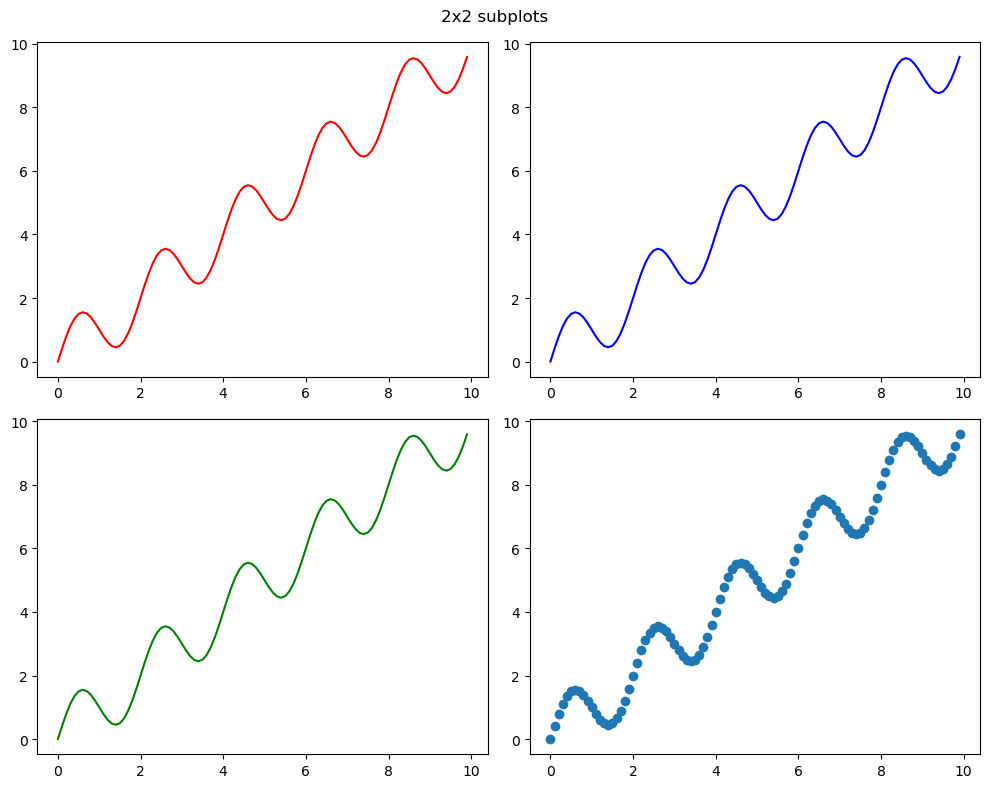

In [28]:
#14.Create subplots for the following data
#x = np.arange(0, 10, 0.1)
#y = np.sin(np.pi * x) + x 
#using an object-oriented approach, and arrange the subplots in a 2x2 grid layout
x = np.arange(0, 10, 0.1)
y = np.sin(np.pi * x) + x 
fig, axs=plt.subplots(2,2,figsize=(10,8))
axs[0][0].plot(x,y,'r')
axs[0][1].plot(x,y,'b')
axs[1][0].plot(x,y,'g')
axs[1][1].plot(x,y,'o')
fig.suptitle("2x2 subplots")

#axs[0][0].set_title("subplots")
plt.tight_layout()

15Create a box plot on any values in the dataset. Ensure that it is analytically correct.


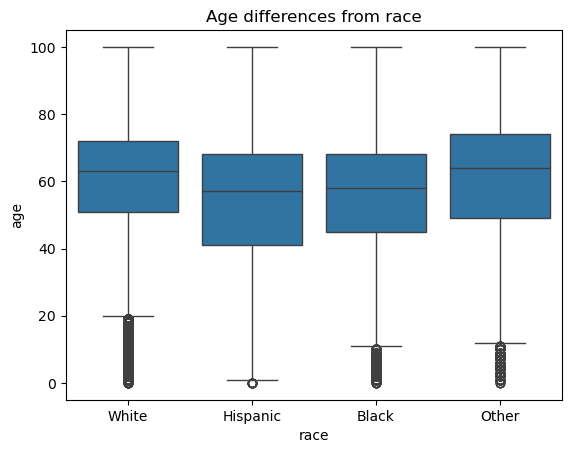

In [51]:
#15Create a box plot on any values in the dataset. Ensure that it is analytically correct.
# the average age of donors from the different race. 
import seaborn as sns
sns.boxplot(x='race',y='age',data=df_donor_details)
plt.title('Age differences from race')

plt.show()

In [17]:
#Question 33.Which year had the maximum referrals
dfs = pd.read_excel('OrganDonor_Consolidated.xlsx',sheet_name = 'ReferralDetails' )
yearwise_count = dfs['Referral_Year'].value_counts()
maxcount_year = yearwise_count.idxmax()
print(f"The Year with maximum referrals is {maxcount_year}")

The Year with maximum referrals is 2021


In [18]:
#Question 34 How Many Organs are recovered for transplant but not transplanted?
dfs1 = pd.read_excel('OrganDonor_Consolidated.xlsx',sheet_name = 'Outcomes' )
valuetobe_counted = 'Recovered for Transplant but not Transplanted'
column_names  = dfs1.columns #['outcome_heart','outcome_liver','outcome_kidney_left','outcome_kidney_right','outcome_lung_left','outcome_lung_right','outcome_intestine','outcome_pancreas']
count = 0
for column_name in column_names:
    count  += dfs1[column_name].value_counts().get(valuetobe_counted,0)
    
print(count)

3245


In [19]:
#Question 35 . What are the 3 most frequenst causes of death?
dfs2 = pd.read_excel('OrganDonor_Consolidated.xlsx',sheet_name = 'DonorDetails' )
cause_death = dfs2['causeofdeath'].value_counts()
most_frequent = cause_death.head(3)

key_cause = ' , '.join(most_frequent.keys())
print(f"The 3 most frequent causes of death are {key_cause}")

The 3 most frequent causes of death are Anoxia , Unknown , cerebrovascular accident


In [20]:
#Question 36.How many transplants were registered under each OPO?
dfs3 = pd.read_excel('OrganDonor_Consolidated.xlsx',sheet_name = 'OPO_HospDetails' )
transplants_eachopo = dfs3['OPO'].value_counts()
print(transplants_eachopo)

OPO4    33641
OPO1    32148
OPO6    22915
OPO2    16145
OPO5    15738
OPO3    12514
Name: OPO, dtype: int64


In [ ]:
#Question 37.Plot a stacked bar chart to show different procurement outcomes for organs - heart, liver, and pancreas.
 #Label the bars with the actual numbers for each outcome.

In [21]:
#Question 38.What percentage of all transplants are lung transplants
dfs1 = pd.read_excel('OrganDonor_Consolidated.xlsx',sheet_name = 'Outcomes' )
count_patients = len(dfs1)

valuetobe_counted = 'Transplanted'


count_left = dfs1['outcome_lung_left'].value_counts()
count_left_transplanted = count_left.get(valuetobe_counted, 0)


count_right = dfs1['outcome_lung_right'].value_counts()
count_right_transplanted = count_right.get(valuetobe_counted, 0)


# percentage of left lung transplants
percentage_left_lung = (count_left_transplanted/count_patients)*100
percentage_right_lung = (count_right_transplanted/count_patients)*100
print(f"Percentage of left lung transplants is : {percentage_left_lung:.2f}%")
print(f"Percentage of right lung transplants is: {percentage_right_lung:.2f}%")

Percentage of left lung transplants is : 22.51%
Percentage of right lung transplants is: 22.31%


In [22]:
#Question 39.Which year had the maximum number of procurements?
dfs = pd.read_excel('OrganDonor_Consolidated.xlsx',sheet_name = 'ReferralDetails' )
date_column = 'time_procured' 
dfs[date_column] = pd.to_datetime(dfs[date_column])
dfs['year'] = dfs[date_column].dt.year
year_count = dfs['year'].value_counts()
max_year = year_count.idxmax()
max_count = year_count.max()
print(f"The year with the maximum procurements is {int(max_year)} with {max_count} procurements.")

The year with the maximum procurements is 2035 with 1619 procurements.


In [23]:
#Question 40.Create a dataframe with date and time as columns, where the values are the referral time.
dfs = pd.read_excel('OrganDonor_Consolidated.xlsx',sheet_name = 'ReferralDetails' )
datestamp_column = 'time_referred'
dfs[datestamp_column] = pd.to_datetime(dfs[datestamp_column], errors='coerce')
dfs['PID'] = dfs['PatientID']
dfs['Date'] = dfs[datestamp_column].dt.strftime('%m/%d/%Y')
dfs['Referral Time'] = dfs[datestamp_column].dt.strftime('%I:%M %p')
print(dfs[['PID','Date','Referral Time']])

                 PID        Date Referral Time
0       OPO1_P320866  06/21/2033      06:49 AM
1       OPO1_P549364  11/21/2036      08:41 AM
2       OPO1_P536997  08/23/2030      11:28 PM
3       OPO1_P463285  05/12/2034      05:34 PM
4       OPO1_P284978  02/22/2033      04:45 AM
...              ...         ...           ...
133096  OPO6_P384794  07/10/2034      01:26 PM
133097  OPO6_P902138  08/04/2035      05:13 AM
133098    OPO6_P5461  03/13/2031      08:13 PM
133099  OPO6_P942291  11/20/2032      01:32 PM
133100  OPO6_P210235  02/26/2030      05:22 AM

[133101 rows x 3 columns]


In [ ]:
#Question 41.Create a pair plot of the outcomes, using different outcome statuses as the hue.

In [24]:
#Question 42.What is the ratio of referrals to transplants by year?
yearly_counts = dfs['Referral_Year'].value_counts()
count_transplanted =dfs[dfs['transplanted'] == 1].groupby('Referral_Year').size()
ratio = yearly_counts / count_transplanted
print(ratio.round(2))

2015    13.19
2016    12.63
2017    13.26
2018    15.06
2019    13.45
2020    16.36
2021    18.22
dtype: float64


In [25]:
#Question 43.How many donors died from a drug overdose?
dfs2 = pd.read_excel('OrganDonor_Consolidated.xlsx',sheet_name = 'DonorDetails' )
cause_death = dfs2['causeofdeath'].value_counts()
count_DrugOverdose = cause_death.get('Drug Overdose',0)
print(f"Number of Donors died from Drug Overdose are : {count_DrugOverdose}")

Number of Donors died from Drug Overdose are : 156


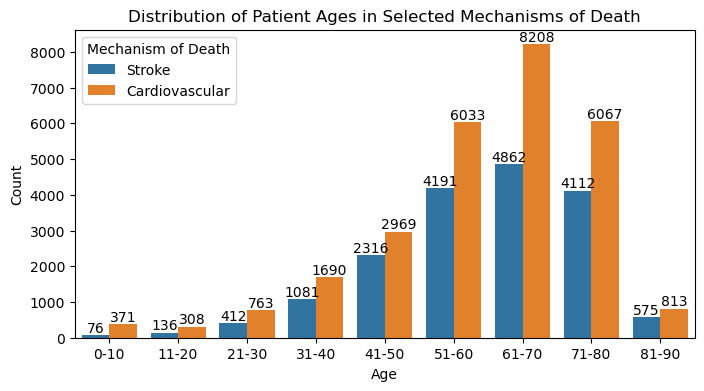

In [43]:
#Question 44.Create a count plot to show distribution of patient-ages in any 2 mechanisms of death.
dfs2 = pd.read_excel('OrganDonor_Consolidated.xlsx',sheet_name = 'DonorDetails' )
step_size = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]
groups = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90']
dfs2['age_group'] = pd.cut(dfs2['age'], bins=step_size, labels=groups, right=False)
mech_of_death = ['Stroke','Cardiovascular' ]
selected_mechofdeath = dfs2[dfs2['mechanism_of_death'].isin(mech_of_death)]
plt.figure(figsize=(8, 4))
dee = sns.countplot(data=selected_mechofdeath, x='age_group', hue='mechanism_of_death')
for container in dee.containers:
   dee.bar_label(container, fmt='%d', label_type='edge')
plt.title('Distribution of Patient Ages in Selected Mechanisms of Death')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Mechanism of Death')
#plt.tight_layout()
plt.show()

In [57]:
#Question 45.Create a Waffle chart to show what percentage of total deaths belong to each mechanism
import matplotlib as mpl
dfs2 = pd.read_excel('OrganDonor_Consolidated.xlsx',sheet_name = 'DonorDetails' )
count_of_mech = dfs2['mechanism_of_death'].value_counts()
total_deaths = len(dfs2)
percentages_each_mech = (count_of_mech / total_deaths * 100).round(2)
print(percentages_each_mech)






Unknown                      25.97
Cardiovascular               20.49
Natural Causes               19.45
Stroke                       13.36
None of the Above             6.58
Blunt Injury                  6.25
Drug Intoxication             2.88
Gun Shot Wound                1.50
Asphyxiation                  1.46
Death from Natural Causes     0.67
Seizure                       0.58
Drowning                      0.38
Gunshot Wound                 0.22
Other                         0.08
Stab                          0.06
Electrical                    0.04
Sudden Infant Death           0.03
None of the above             0.01
Name: mechanism_of_death, dtype: float64


In [26]:
#Question 46.How many donors were registered under each hospital?
dfs3 = pd.read_excel('OrganDonor_Consolidated.xlsx',sheet_name = 'OPO_HospDetails' )
donors_eachhosp = dfs3['HospitalID'].value_counts()
print(donors_eachhosp)

OPO4_H16532    3682
OPO6_H22175    3629
OPO6_H6602     3578
OPO3_H4291     3123
OPO4_H30877    2335
               ... 
OPO5_H11845       1
OPO2_H6517        1
OPO2_H5905        1
OPO2_H158         1
OPO6_H21263       1
Name: HospitalID, Length: 557, dtype: int64


In [27]:
#Question 47.What is the predominant 'identified mechanism of death' among the youngest donors in the dataset.
dfs2 = pd.read_excel('OrganDonor_Consolidated.xlsx',sheet_name = 'DonorDetails' )
youngest_donor_age = dfs2['age'].min()
youngest_donors = dfs2[dfs2['age']== youngest_donor_age]
mech_of_death = youngest_donors['causeofdeath'].value_counts()
max_mech_of_death = mech_of_death.idxmax()
print(f" The predominant mechanism of death among the youngest donors who is of age {int(youngest_donor_age)} is {max_mech_of_death}")

 The predominant mechanism of death among the youngest donors who is of age 0 is Unknown
